In [76]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [77]:
im = cv2.imread('images/img_01.jpg', 0)

True

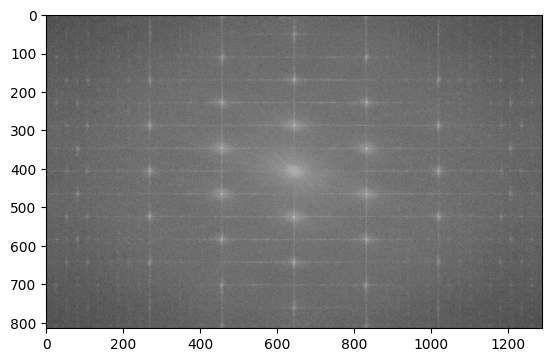

In [236]:
fft = np.fft.fft2(im)
fft_shift = np.fft.fftshift(fft)
plt.imshow(20*np.log(np.abs(fft_shift)), cmap='gray')
cv2.imwrite('denoised.jpg', 20*np.log(np.abs(fft_shift)))

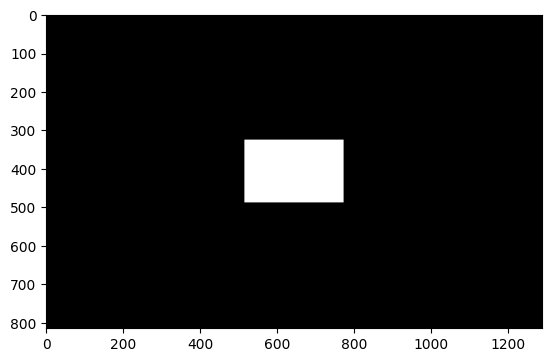

In [95]:
x, y = fft.shape
filter = np.zeros(fft_shift.shape)
filter[int(0.4 * x):int(0.6 * x),int(0.4 * y):int(0.6 * y)] = 1
plt.imshow(filter, cmap='gray')

In [96]:
fft2_shift = fft_shift * filter
fft_2 = np.fft.ifftshift(fft2_shift)
denoised = np.fft.ifft2(fft_2).real

(<matplotlib.image.AxesImage at 0x20b494c42e0>,
 Text(0.5, 1.0, 'original image'),
 ([], []),
 ([], []))

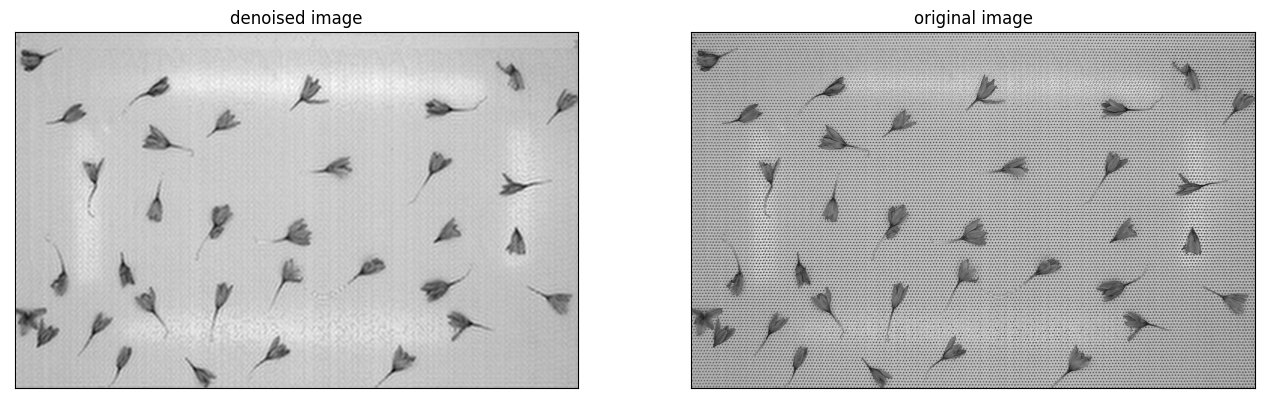

In [97]:
plt.figure(figsize=(16, 16))
plt.subplot(121)
plt.imshow(denoised, cmap='gray'), plt.title('denoised image'), plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(im, cmap='gray'), plt.title('original image'), plt.xticks([]), plt.yticks([])

In [114]:
denoised = denoised.astype(np.uint8)

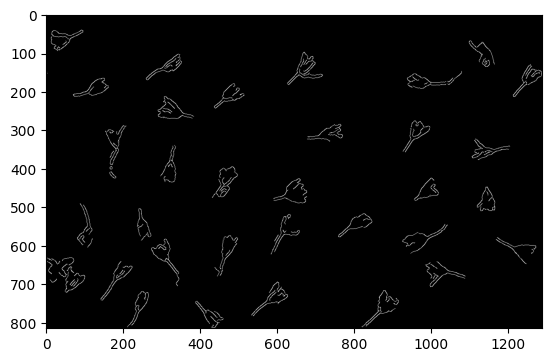

In [169]:
edge = cv2.Canny(denoised, 50, 120)
plt.imshow(edge, cmap='gray')

In [122]:
grad_x = cv2.Sobel(edge, cv2.CV_64F, 1, 0)
grad_y = cv2.Sobel(edge, cv2.CV_64F, 0, 1)

In [166]:
dir = np.arctan2(grad_y, grad_x)